In [ ]:
!pip install  pygal
!pip install aif360
!pip install cufflinks

In [1]:
#import all required libraries
#Data Analysis
import pandas as pd
import numpy as np
import json
#Visulaization libraries
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.palettes import Viridis5
import seaborn as sns
import matplotlib.pyplot as plt
import pygal
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#model developemnt libraries
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
#Bias Mitigation libraries
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from IPython.display import Markdown, display
from aif360.algorithms.preprocessing.reweighing import Reweighing

from IPython.display import SVG, display


In [2]:
#if you want to donload data from online ! enable below line by removing # at starting
df_data = pd.read_csv('emp.csv')
df_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<h3>the colums in the data set are (features):

In [3]:
df_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<h4>get to know abount data</h4>

In [4]:
df_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<h1>upto this Datacollection part is over 
    now we will enter into data preprocessing</h1>

In [5]:
df_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<h4> from above we observed that no missing values are there </h4>

In [6]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
data_encoded = df_data.copy(deep=True)#deep copying
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df_data[col])#column names keeping same
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))#automatic labeling
        print('Feature', col)#printing All 
        print('mapping', le_name_mapping)


Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}
Feature EducationField
mapping {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}


In [7]:
data_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


<h3>Now we will find relations among the data ."Data Exploration" process</h3>

In [8]:
data_encoded['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [9]:
data_encoded.shape

(1470, 35)

<h4>from the above we conclude that the data is unbalanced </h4>
<p>because 0's are > 1's</p>

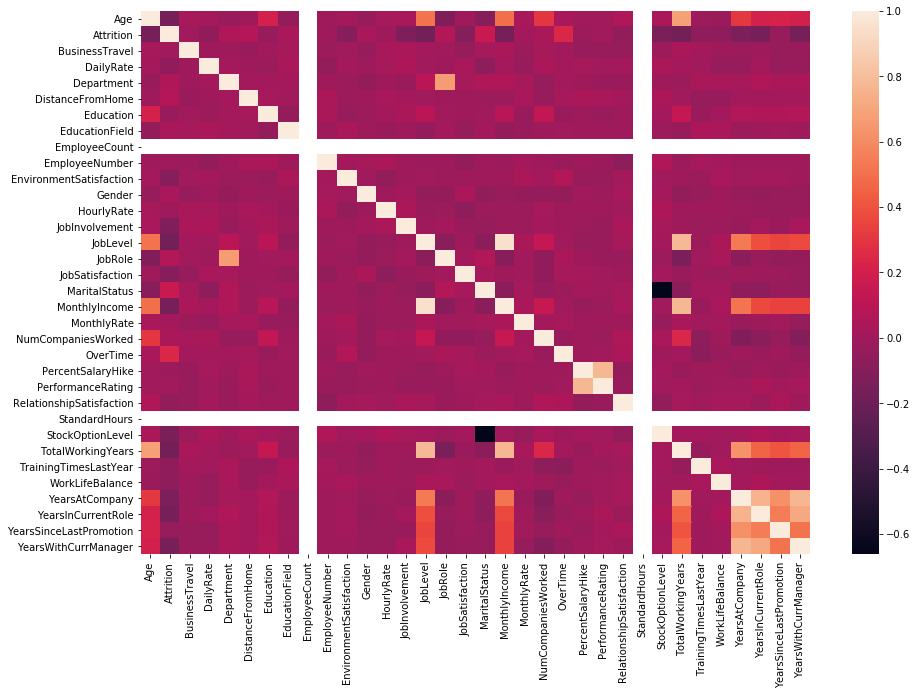

In [10]:
data_correlation = data_encoded.corr()
plt.rcParams["figure.figsize"] = [15,10]#corellation graph
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

<h1>Observations:</h1>
<p>from above we observe that so many features are corellated</p>
<li>Employee count and Standard Hours are perfect positive correlative so we can remove it</li>
<li>monthly income is higly  corellated with job level and total working years</li>
<li>total working years with age </li>
<li>Departmet with jobrole</li>
<li>Years at company,Years in current role, Years since last promotion,Years with current manager are mostly similar</li>
<li > marital status is inversly corellated to stock option level</li>
<h4>now we will zoom them</h4>

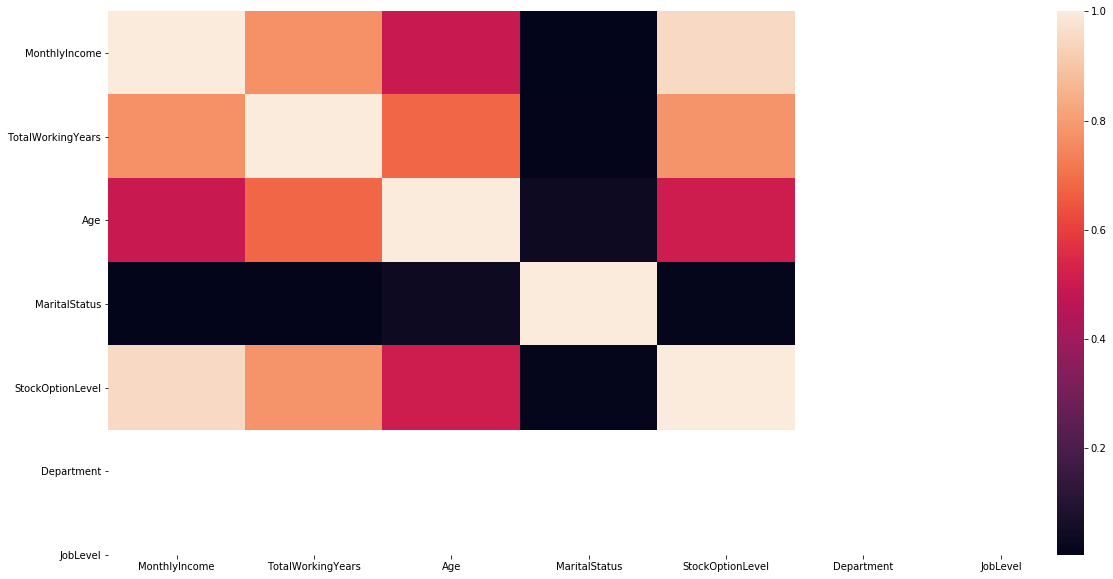

In [11]:
data_corr_filtered = df_data[['MonthlyIncome', 'TotalWorkingYears', 'Age', 'MaritalStatus', 'StockOptionLevel','Department',
                      'JobLevel']]
correlation = data_corr_filtered.corr()
plt.rcParams["figure.figsize"] = [20,10]
sns.heatmap(correlation,xticklabels=data_corr_filtered.columns,yticklabels=data_corr_filtered.columns)

<h2> next step is data visualization we will visualize each feature with attrition</h2>
    <h4>1)Age and Attrition</h4>

(array([  0.,  17., 309., 622., 349., 168.,   5.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

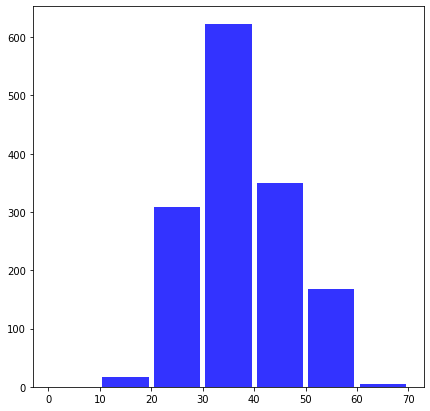

In [12]:
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(data_encoded['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='blue')

<h1>Observations:</h1>
<h4>above shows there are more employees in 30 to 40 group</h4>
<h5> now we will divide people into left and continued</h5>

(array([ 0., 10., 81., 89., 34., 23.,  0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

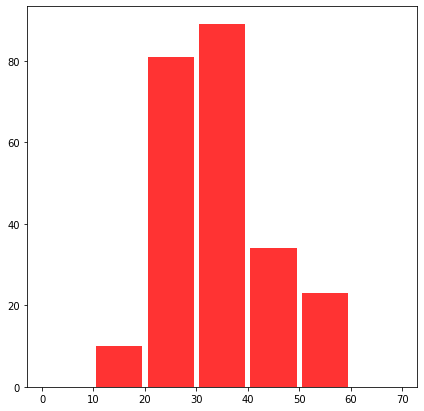

In [13]:

positive_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 1]#left 
negative_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 0]#continued
plt.hist(positive_attrition_df['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

<h1>Observations:</h1>
<h4> we observe that the people in age group 20 - 40 are quitting more</h4>
<h3> 2)Businees travel vs Attrition</h3>

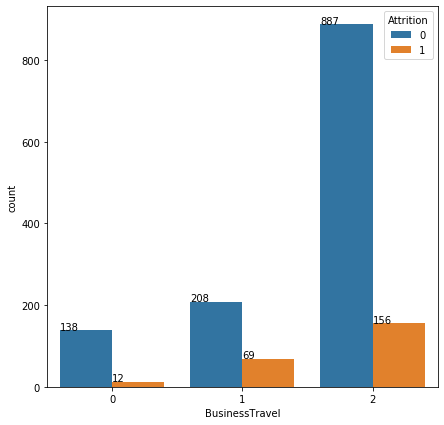

In [14]:
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

<h1>Observations:</h1>
<h4> we can observe that business travel is not effecting that much</h4>
<p> but people with rarely travel are likely to leave company</p>
<h3>3) Daily rate  vs Attrition</h3>


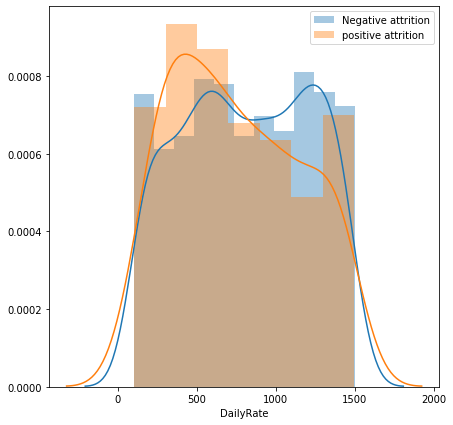

In [15]:
sns.distplot(negative_attrition_df['DailyRate'], label='Negative attrition')
sns.distplot(positive_attrition_df['DailyRate'],label='positive attrition')
plt.legend()

<h2>Observations</h2>
<p>from the above we ovbserved it will not affect attrition since bothh are equal</p>
<p>the difference is around 0.000015 so we neglet it</p>
<br><br><br>
<h1> 4)Department vs Attrition</h1>

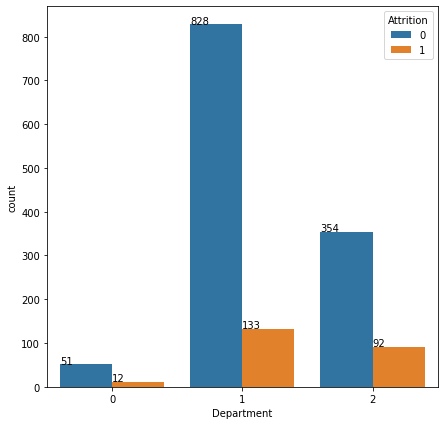

In [16]:
ax = sns.countplot(x="Department", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

<h1>Observations:</h1>
<p> we observe that the poeople in category one and two are likely to leave</p>
<li> 1 - Research & Development</li>
 <li> 2 - Sales</li>
 <h1>5) Distance from home vs atrrition</h1>

(array([807., 246., 180.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

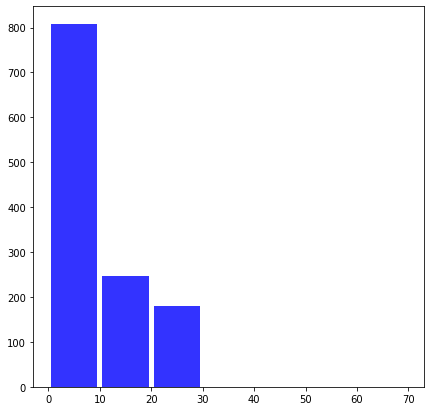

In [17]:
plt.hist(negative_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='blue')#not Quit members

(array([133.,  55.,  49.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

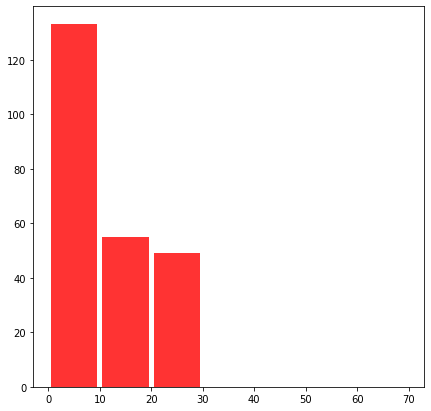

In [18]:
plt.hist(positive_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')#left out ones

<h1>OBSERVATIONS</h1>
<h4>from the above we observe that the people nearer to company are leaving more</h4>
<h1>6)Education versus attrition</h1>

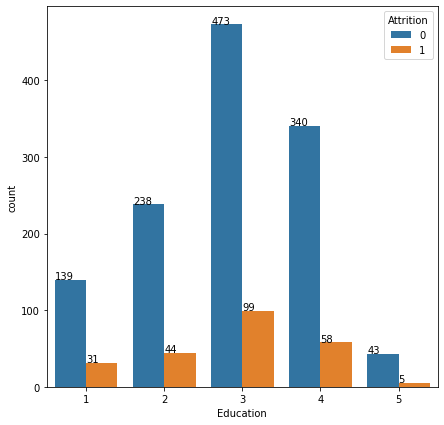

In [19]:
ax = sns.countplot(x="Education", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

<h2>Observations</h2>
<p>from above we observe that 40% of category 3 and 25% of category 4 are likely to leave</p>
<ol>
<li>category 3 - batchelour degree</li>
<li>category 4 - masters degree</li></ol>
<h2>  7)Education Field vs attrition</h2>

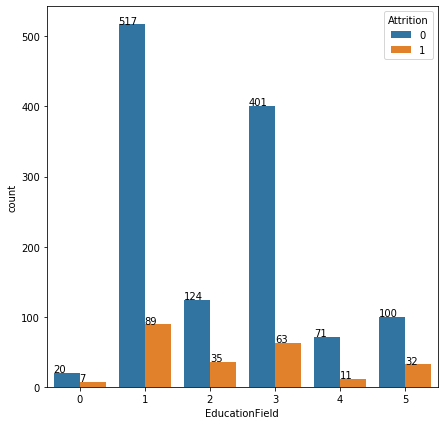

In [20]:
ax = sns.countplot(x="EducationField", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

<h3>Observations:</h3>
<p>from the graph we observed that the percentage of quitting of fields are less than 20% so this may no be useful</p>
<h3>Next is 8)employement count since data is for simgle employee every value is one so no need to visualize it </h3>
<h3>9)employee id it is not useful at all for prediction</h3>
<h1>10)Enivironment Satisfaction vs Attrition</h1> 
        

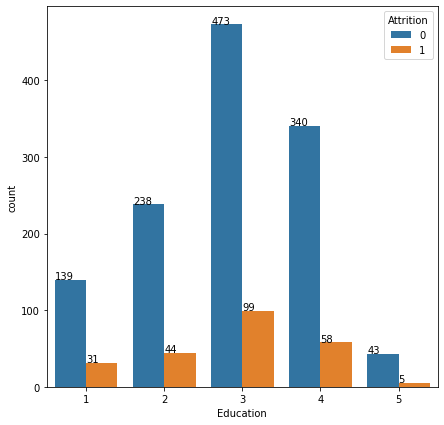

In [21]:
ax = sns.countplot(x="Education", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

<h3>Observations:</h3>
<p>from the graph we observed that the percentage of quitting is more or less equal</p>
<h1>11)Gender vs Attrition</h1>

In [22]:
df_age = data_encoded.copy(deep=True)
df_age.loc[df_age['Age'] <= 20, 'Age'] = 0
df_age.loc[(df_age['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_age.loc[(df_age['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_age.loc[(df_age['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_age.loc[(df_age['Age'] > 50), 'Age'] = 4
df_age = pd.DataFrame({'count': df_age.groupby(["Gender", "Attrition"]).size()}).reset_index()
df_age['Gender-attrition'] = df_age['Gender'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)
df_age

,Gender,Attrition,count,Gender-attrition
0,0,0,501,0-0
1,0,1,87,0-1
2,1,0,732,1-0
3,1,1,150,1-1


Here,<ol>
<li> Gender - 0 and Attrition - 0 = Female who will stay</li>
<li> Gender - 0 and Attrition - 1 = Female who will leave</li>
<li> Gender - 1 and Attrition - 0 = Male who will stay</li>
<li> Gender - 1 and Attrition - 1 = Male who will leave</li></ol>

In [23]:
output_notebook() 
Gender_Attrition = df_age['Gender-attrition'].tolist()
count = df_age['count'].tolist()
print(count)
source = ColumnDataSource(data=dict(Gender_Attrition=Gender_Attrition, count=count, color=Viridis5))# Bokeh's mapping 
plot_bar = figure(x_range=Gender_Attrition, plot_height=350, title="Counts")
plot_bar.vbar(x='Gender_Attrition', top='count', width=0.9, color='color', source=source)
show(plot_bar)

Loading BokehJS ...

[501, 87, 732, 150]


C:\Users\LOKSUNDAR\Anaconda3\lib\site-packages\bokeh\models\sources.py:175: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('Gender_Attrition', 4), ('color', 5), ('count', 4)



<h2>Observations:</h2>
<p> from above we can conclude that the male workers are likely to quit more than female workers</p>
<h3>Next ,Job role vs Attrition</h3>

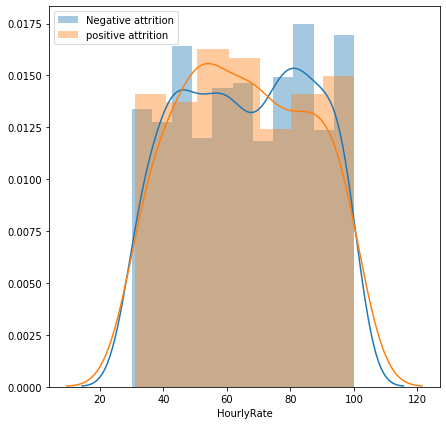

In [24]:
sns.distplot(negative_attrition_df['HourlyRate'], label='Negative attrition')
sns.distplot(positive_attrition_df['HourlyRate'], label='positive attrition')
plt.legend()

<h3>Observations</h3>
<p>From the plot we observed that the graph is not giving any promising information</p>
<h1>12)Job Involvement vs Attrition</h1>

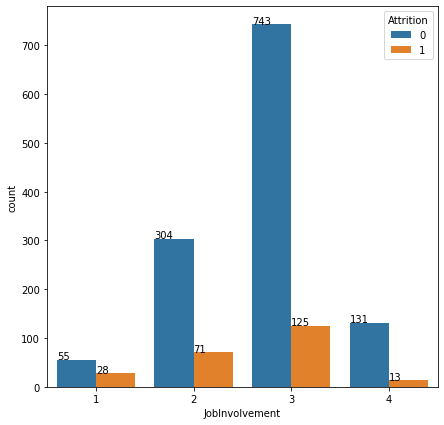

In [25]:
ax = sns.countplot(x="JobInvolvement", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

<h1>Observations</h1>
<p>From the above graph,the people with jobinvolvement 3 are quitting<p>
<br><h3>13)Job level and 14)job Role are equal </h3>
<h1>14)Job Role vs Attrition</h1>

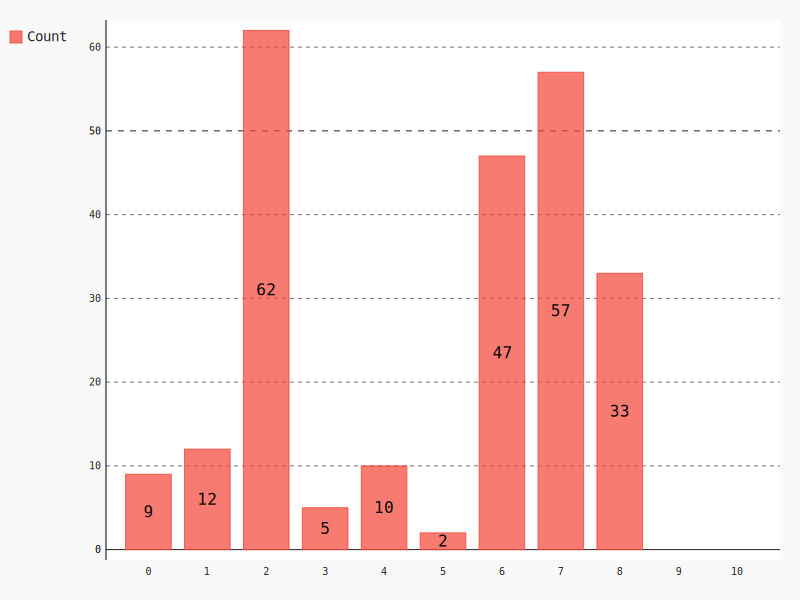

In [26]:
df_jrole = pd.DataFrame({'count': data_encoded.groupby(["JobRole", "Attrition"]).size()}).reset_index()
df_jrole_1 = df_jrole.loc[df_jrole['Attrition'] == 1]#Considering attrition case
import pygal
chart = pygal.Bar(print_values=True)
chart.x_labels = map(str, range(0,11))
chart.add('Count', df_jrole_1['count'])
display(SVG(chart.render(disable_xml_declaration=True)))

###### 'Healthcare Representative': 0, 
###### 'Human Resources': 1,
###### 'Laboratory Technician': 2,
###### 'Manager': 3, 
###### 'Manufacturing Director': 4,
###### 'Research Director': 5, 
###### 'Research Scientist': 6, 
###### 'Sales Executive': 7, 
###### 'Sales Representative': 8
From above we observe that 'Laboratory Technician': 2,'Research Scientist': 6,'Sales Executive': 7,Sales Representative': 8 are more likely to Quit 
<h2> 15 )Job Satisfaction is more corellated to Environ ment satisfaction</h2>
<h2> 16)Marital Status vs Attrition</h2>
Categories:<br>
    1. 'Divorced': 0<br>
    2. 'Married' : 1<br>
    3. 'Single'  : 2<br>

In [27]:
init_notebook_mode(connected=True)
cf.go_offline()
positive_attrition_df['MaritalStatus'].value_counts().iplot(kind='bar')

<h2>Observation</h2>
nearly 50% of the pople who are quitting is Single persons
<br>
<br>
<h1> 17)MOnthly income vs Attrition</h1>

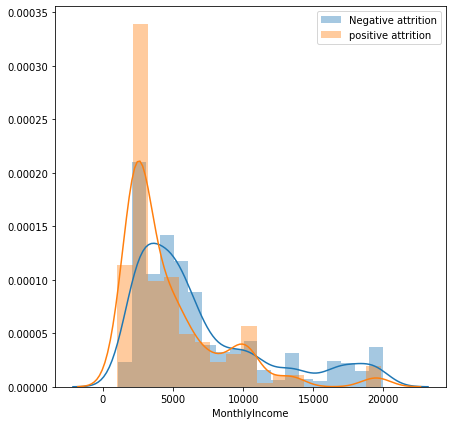

In [28]:
sns.distplot(negative_attrition_df['MonthlyIncome'], label='Negative attrition')
sns.distplot(positive_attrition_df['MonthlyIncome'], label='positive attrition')
plt.legend()

<h2>Observations</h2>
<p>from above we observed that the poeple with less salary are quitting more</p>
<h2> 18)MOnthly rate is similar to Montly income</h2>
<br>
<br>
<h1>19)Num of comanies worked vs Attrition</h1>


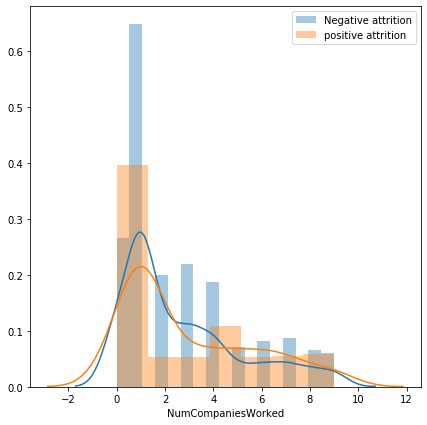

In [29]:
sns.distplot(negative_attrition_df['NumCompaniesWorked'], label='Negative attrition')
sns.distplot(positive_attrition_df['NumCompaniesWorked'], label='positive attrition')
plt.legend()

<h2>Observations</h2>
<p>from the above we ovbserved it will not affect attrition since positive is below than negative cureve</p>
<br><br><br><h2>20)Over18 All are over 18</h2>
<h1>21)Over Time vs Attrition</h1>

In [30]:
init_notebook_mode(connected=True)
cf.go_offline()
positive_attrition_df['OverTime'].value_counts().iplot(kind='bar')

<h2>Observations</h2>
<p>Overtime will not effect that much</p>
<br><br><br>
<h1>22)Percentage Salary Hike worked vs Attrition</h1>

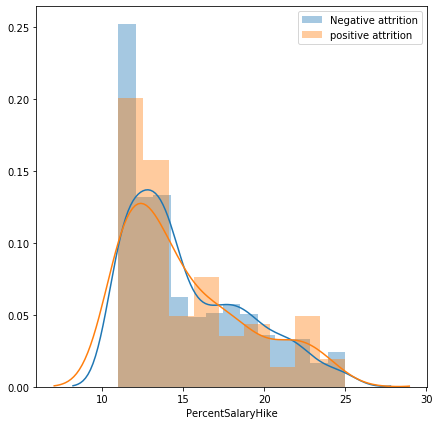

In [31]:
sns.distplot(negative_attrition_df['PercentSalaryHike'], label='Negative attrition')
sns.distplot(positive_attrition_df['PercentSalaryHike'], label='positive attrition')
plt.legend()

<h2>Observations</h2>
<p>from the above we ovbserved it will not affect attrition since positive is below than negative cureve</p>
<br><br><br>
<h1> 23)Performance Rating vs Attrition</h1>

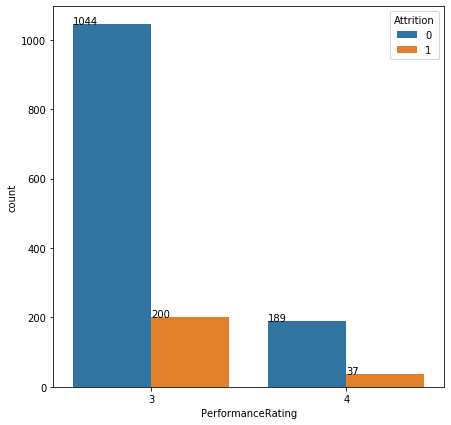

In [32]:
ax = sns.countplot(x="PerformanceRating", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [33]:
1044/200,189/37

(5.22, 5.108108108108108)

<h3>Observations:</h3>
<p>from the graph we observed that the distribution of quitting is  equal</p>
<h1>24)Relation Ship Satisfaction vs Attrition</h1>

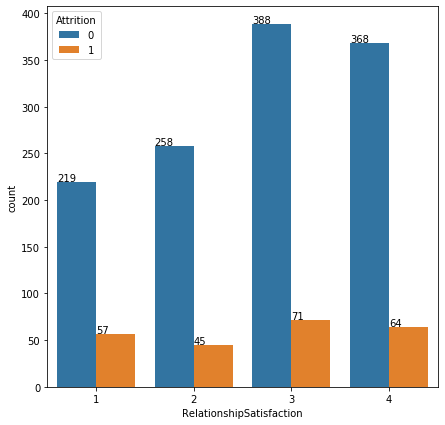

In [34]:
ax = sns.countplot(x="RelationshipSatisfaction", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [35]:
219/57,258/45,388/71,368/64

(3.8421052631578947, 5.733333333333333, 5.464788732394366, 5.75)

<h3>Observations:</h3>
<p>from the graph we observed that the distribution of quitting is  equal</p>
<h2>25)Standard Hours are equla to 80 for all emplyees</h2>
<h1>26)Stock Option level vs Attrition</h1>

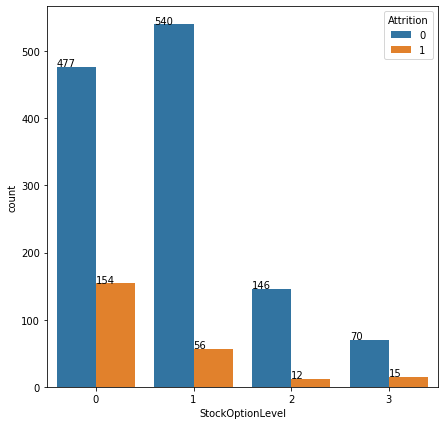

In [36]:
ax = sns.countplot(x="StockOptionLevel", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [37]:
154/477,56/540

(0.3228511530398323, 0.1037037037037037)

<h3>observations</h3>
<p>32% of the persons with stock optionlevel 0 are leaving the job</p>
<h1>27)Total Working Years Vs Attriton</h1>

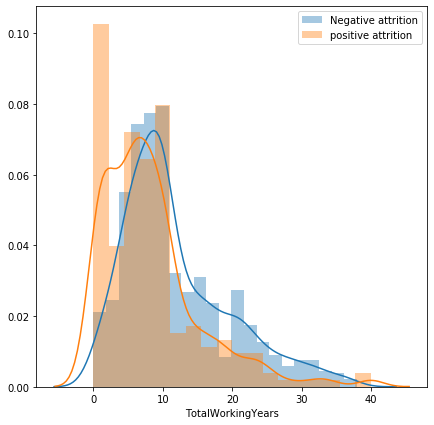

In [38]:
sns.distplot(negative_attrition_df['TotalWorkingYears'], label='Negative attrition')
sns.distplot(positive_attrition_df['TotalWorkingYears'], label='positive attrition')
plt.legend()

<h3>Observations</h3>
<p> The persons with worling years lessthan 5 are more likely to quit the job</p>
<p>ANd the persons with working years graeterthan 8  are not willing to quit the job</p>
<h1>28)Training Times Last Year vs Attrition </h1>

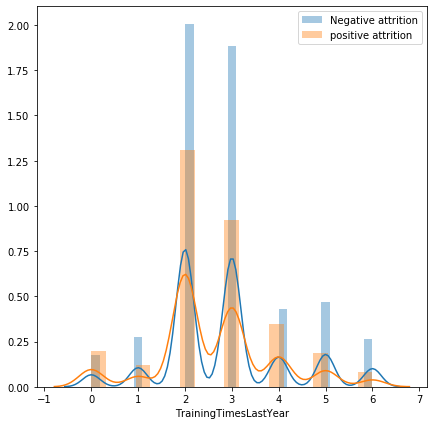

In [39]:
sns.distplot(negative_attrition_df['TrainingTimesLastYear'], label='Negative attrition')
sns.distplot(positive_attrition_df['TrainingTimesLastYear'], label='positive attrition')
plt.legend()

<h3>Observations</h3>
<p>We observe taht the both curves are in Similar postions So This will not be useful </p>
<h1>29)Work Life Balance vs Attrition</h1>

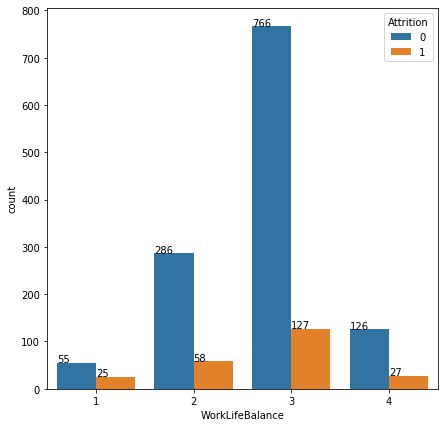

In [40]:
ax = sns.countplot(x="WorkLifeBalance", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [41]:
127/766,58/286

(0.16579634464751958, 0.20279720279720279)

<h3>observations</h3>
<p>From the graph we observe that the percentages are less than 20% so this infromation may not be useful</p>
<h1>30)Years at Company vs attrition</h1>

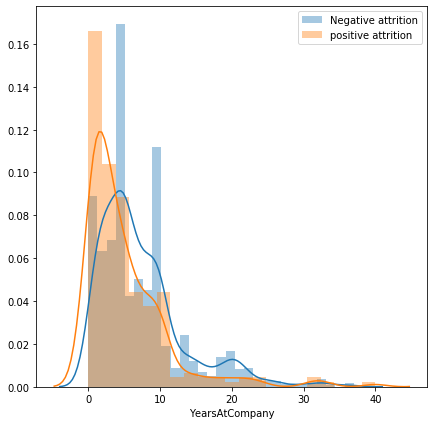

In [42]:
sns.distplot(negative_attrition_df['YearsAtCompany'], label='Negative attrition')
sns.distplot(positive_attrition_df['YearsAtCompany'], label='positive attrition')
plt.legend()

<h3>Observations</h3>
<p> The persons with worling years lessthan 5 are more likely to quit the job</p>
<p>ANd the persons with working years graeterthan 5  are not willing to quit the job</p>
<h1>31)Years in current role vs Attrition </h1>

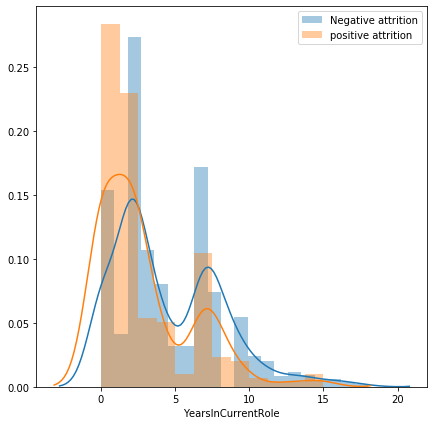

In [43]:
sns.distplot(negative_attrition_df['YearsInCurrentRole'], label='Negative attrition')
sns.distplot(positive_attrition_df['YearsInCurrentRole'], label='positive attrition')
plt.legend()

<h3>Observations</h3>
<p> The persons with working years lessthan 2years are more likely to quit the job</p>
<h1>32)Years since Last Promotion vs Attrition </h1>

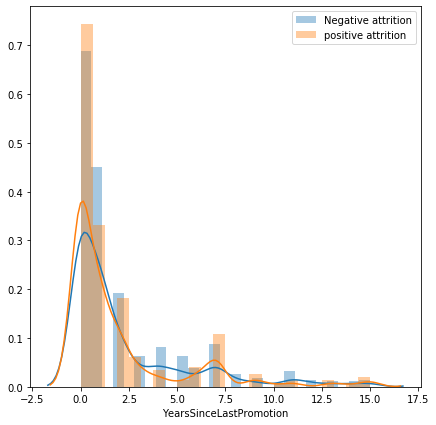

In [44]:
sns.distplot(negative_attrition_df['YearsSinceLastPromotion'], label='Negative attrition')
sns.distplot(positive_attrition_df['YearsSinceLastPromotion'], label='positive attrition')
plt.legend()

<h3>Observations</h3>
<p> From the graph we observe that Both cuurves are nearly Equal  </p>
<h1>32)Years with current manager vs Attrition </h1>

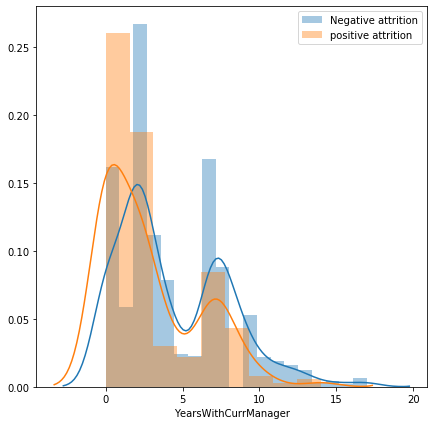

In [45]:
sns.distplot(negative_attrition_df['YearsWithCurrManager'], label='Negative attrition')
sns.distplot(positive_attrition_df['YearsWithCurrManager'], label='positive attrition')
plt.legend()

<h3>Observations</h3>
<p> The persons with same current manager with years lessthan 2years are more likely to quit the job</p>


<h1> Model Development</h1>
<H3> Removing some of the features which are meant to be useless in Data Visualizing process</h3>

In [46]:
columns = ['DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
        'Over18', 'RelationshipSatisfaction', 'StandardHours']
data_encoded.drop(columns, inplace=True, axis=1)

<h2> Input Data</h2>

In [47]:
input_data = data_encoded.drop(['Attrition'], axis=1)
input_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1,2,2,0,3,2,7,...,11,3,0,8,0,1,6,4,0,5
1,49,1,1,8,1,3,1,2,2,6,...,23,4,1,10,3,3,10,7,1,7
2,37,2,1,2,2,4,1,2,1,2,...,15,3,0,7,3,3,0,0,0,0
3,33,1,1,3,4,4,0,3,1,6,...,11,3,0,8,3,3,8,7,3,0
4,27,2,1,2,1,1,1,3,1,2,...,12,3,1,6,3,3,2,2,2,2


In [48]:
target_data = data_encoded[['Attrition']]

In [49]:
target_data.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [50]:
len(input_data.columns)

25

<h1>Feature Selection</h1>
<h3>Mutual Information Method</h3>
 Mutual information is 0, then variable X carries no information about the variable Y. X and Y are independent.<br>
Mutual information is 1, then variable X can be determined from variable Y. X and Y are dependent.


In [51]:
col_values = list(input_data.columns.values)
feature_scores = mutual_info_classif(input_data, target_data)
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:15]:#Displays top 15
    print(fname, score)

C:\Users\LOKSUNDAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



TotalWorkingYears 0.0405864538391667
JobLevel 0.038181131441117344
JobRole 0.0358917036732882
MonthlyIncome 0.032313603414975134
YearsWithCurrManager 0.023842107122788114
OverTime 0.023082539716008377
Education 0.02175221445965181
StockOptionLevel 0.021145011147814197
Age 0.019248521229155546
MaritalStatus 0.016660310371423348
YearsInCurrentRole 0.016107663999454847
YearsAtCompany 0.015984602122780966
JobInvolvement 0.014537269039641032
BusinessTravel 0.012666236776319284
EnvironmentSatisfaction 0.01220506938103183


## Chi-square method



In [52]:
feature_scores = chi2(input_data, target_data)[0]
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:15]:#display Top 15
    print(fname, score)

MonthlyIncome 127922.29369381821
TotalWorkingYears 230.72161773754925
YearsAtCompany 142.10005430324915
YearsInCurrentRole 117.5225958913567
YearsWithCurrManager 110.6715338985734
Age 84.15527681001525
OverTime 63.84506671452294
DistanceFromHome 63.77214163101213
StockOptionLevel 25.26882603175403
JobLevel 24.93924234571862
MaritalStatus 18.745657458341153
JobRole 9.004448467467538
YearsSinceLastPromotion 7.601723473243281
JobSatisfaction 7.011946634881222
EnvironmentSatisfaction 6.890594338387591


<h3> Selecting colums Depending on above two methods</h3>

In [53]:
data_selected = df_data[['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome', 'StockOptionLevel',
                      'JobLevel', 'JobRole', 'WorkLifeBalance', 'Gender', 'Attrition']]

In [54]:
data_selected.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender,Attrition
0,5993,8,6,4,5,41,Yes,1,0,2,Sales Executive,1,Female,Yes
1,5130,10,10,7,7,49,No,8,1,2,Research Scientist,3,Male,No
2,2090,7,0,0,0,37,Yes,2,0,1,Laboratory Technician,3,Male,Yes
3,2909,8,8,7,0,33,Yes,3,0,1,Research Scientist,3,Female,No
4,3468,6,2,2,2,27,No,2,1,1,Laboratory Technician,3,Male,No


In [55]:
data_selected.shape

(1470, 14)

In [56]:
categorical_column = ['Attrition', 'Gender', 'JobRole',  'OverTime']
data_selected = data_selected.copy(deep=True)#deep copying
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_selected[col] = lab_enc.fit_transform(df_data[col])#column names keeping same
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))#automatic labeling
        print('Feature', col)#printing All 
        print('mapping', le_name_mapping)


Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [57]:
input_data = data_selected.drop(['Attrition'], axis=1)
target_data = data_selected[['Attrition']]

<h3> Splitting into Train,Test and Validation Data</h3>

In [58]:
input_data = data_selected[0:1269]
print('Shape of the input data is ', input_data.shape)
input_data['Attrition'].value_counts()
validation_data = data_selected[1269:1469]
print('Shape of the validation data is ', validation_data.shape)
validation_input_data = validation_data.drop(['Attrition'], axis=1)
print('Shape of the validation input data is ', validation_input_data.shape)
validation_target_data = validation_data[['Attrition']]
print('Shape of the validation target data is ', validation_target_data.shape)
#Using 1 sample as test data to check deployment
test_data = data_selected[1469:]
print(test_data)
print('Shape of the test data is ', test_data.shape)
test_input_data = test_data.drop(['Attrition'], axis=1)
print('Shape of the test input data is ', test_input_data.shape)
test_target_data = test_data[['Attrition']]
print('Shape of the test target data is ', test_target_data.shape)

Shape of the input data is  (1269, 14)
Shape of the validation data is  (200, 14)
Shape of the validation input data is  (200, 13)
Shape of the validation target data is  (200, 1)
      MonthlyIncome  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
1469           4404                  6               4                   3   

      YearsWithCurrManager  Age  OverTime  DistanceFromHome  StockOptionLevel  \
1469                     2   34         0                 8                 0   

      JobLevel  JobRole  WorkLifeBalance  Gender  Attrition  
1469         2        2                4       1          0  
Shape of the test data is  (1, 14)
Shape of the test input data is  (1, 13)
Shape of the test target data is  (1, 1)


In [59]:
!pip install Pipeline_LabelEncoder-0.1.zip

Processing c:\users\loksundar\onedrive\mlproject\pipeline_labelencoder-0.1.zip
  Created wheel for Pipeline-LabelEncoder: filename=Pipeline_LabelEncoder-0.1-py3-none-any.whl size=2067 sha256=0b990cd8060d93362380a2f47dc4f33edb393f55a24ef4a9639b9c326c387e7b
  Stored in directory: c:\users\loksundar\appdata\local\pip\cache\wheels\57\f2\dc\5c7074a901bf5bb4f3c26dd3a01f533eb4de40be73c02b21da
Successfully built Pipeline-LabelEncoder
  Attempting uninstall: Pipeline-LabelEncoder
    Found existing installation: Pipeline-LabelEncoder 0.1
    Uninstalling Pipeline-LabelEncoder-0.1:
      Successfully uninstalled Pipeline-LabelEncoder-0.1


In [60]:
from Pipeline_LabelEncoder.sklearn_label_encoder import PipelineLabelEncoder
preprocessed_data = PipelineLabelEncoder(columns = ['OverTime', 'JobRole', 'Gender']).fit_transform(input_data)
print('-------------------------')
print('validation data encoding')
validation_enc_data = PipelineLabelEncoder(columns = ['OverTime', 'JobRole', 'Gender']).transform(validation_input_data)

Inside fit transform
Feature OverTime
mapping {0: 0, 1: 1}
Feature JobRole
mapping {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
Feature Gender
mapping {0: 0, 1: 1}
-------------------------
validation data encoding
Feature OverTime
mapping {0: 0, 1: 1}
Feature JobRole
mapping {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
Feature Gender
mapping {0: 0, 1: 1}


<h1>Bias removing or Bias Mitigation</h1>
The AI Fairness 360 toolkit is an open-source library to help detect and remove bias in machine learning models.

In [61]:
privileged_groups = [{'Gender': 0}]
unprivileged_groups = [{'Gender': 1}]
favorable_label = 0 
unfavorable_label = 1
#Create binary label dataset that can be used by bias mitigation algorithms
BM_dataset = BinaryLabelDataset(favorable_label=favorable_label,
                                unfavorable_label=unfavorable_label,
                                df=preprocessed_data,
                                label_names=['Attrition'],
                                protected_attribute_names=['Gender'],
                                unprivileged_protected_attributes=unprivileged_groups)

#### Training Data Details

In [62]:
print("shape of the training dataset", BM_dataset.features.shape)
print("Training data favorable label", BM_dataset.favorable_label)
print("Training data unfavorable label", BM_dataset.unfavorable_label)
print("Training data protected attribute", BM_dataset.protected_attribute_names)
print("Training data privileged protected attribute (1:Male and 0:Female)", 
      BM_dataset.privileged_protected_attributes)
print("Training data unprivileged protected attribute (1:Male and 0:Female)",
      BM_dataset.unprivileged_protected_attributes)

shape of the training dataset (1269, 13)
Training data favorable label 0.0
Training data unfavorable label 1.0
Training data protected attribute ['Gender']
Training data privileged protected attribute (1:Male and 0:Female) [array([1.])]
Training data unprivileged protected attribute (1:Male and 0:Female) [array([0.])]


In [63]:
metric_orig_train = BinaryLabelDatasetMetric(BM_dataset, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % 
      metric_orig_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = -0.013894


#### Negative value says that there ia a bias in Data

In [64]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
               privileged_groups=privileged_groups)
RW.fit(BM_dataset)
train_tf_dataset = RW.transform(BM_dataset)

In [65]:
metric_orig_train = BinaryLabelDatasetMetric(train_tf_dataset, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Difference in mean outcomes between unprivileged and privileged groups = %f"
      % metric_orig_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


#### Now No Bias Since difference is 0

<h1>Algorithm</h1>
<h2> Ada Boost Algorithm</h2>
<h4> since it is a highly unbalanced data, Class 0 covers 83.88% of the data whereas class 1 covers 16.12% of the data.</h4>

In [71]:
del(cls)

In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [81]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [82]:
clf.fit(train_tf_dataset.features, train_tf_dataset.labels)

C:\Users\LOKSUNDAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [84]:
validation_enc_data.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender
1269,3539,10,9,7,8,43,0,2,0,1,1,3,1
1270,6029,6,2,2,2,34,0,3,0,2,7,3,0
1271,2679,1,1,0,0,21,0,7,0,1,8,3,1
1272,3702,5,5,4,4,38,0,6,1,1,2,3,0
1273,2398,1,1,0,0,22,1,8,0,1,2,3,0


In [85]:
validation_target_data.head()

,Attrition
1269,0
1270,0
1271,1
1272,0
1273,1


In [102]:
predicted_output=clf.predict(validation_enc_data)
pred=list(predicted_output)

#clf.score(validation_target_data, predicted_output)

In [99]:
val = list(validation_target_data['Attrition'])
val[0:10]

[0, 0, 1, 0, 1, 0, 0, 0, 0, 0]

In [93]:
def compare(F,S):
    n = len(F)
    count = float(0)
    for i in range(0,n):
        if(F[i]==S[i]):
            count = count+1
        accu = float(count/n)
    return accu

In [100]:
compare(val,pred)

0.88

<h3>Final Accuracy is 88%</h3>

In [101]:
clf.feature_importances_


array([0.37, 0.02, 0.1 , 0.08, 0.1 , 0.08, 0.03, 0.05, 0.04, 0.03, 0.06,
       0.03, 0.01])

<h1>Conclusion</h1>
1.Factors contributing more to the employee attrition are MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, 
   YearsWithCurrManager, Age, OverTime, DistanceFromHome, StockOptionLevel, JobLevel, JobRole, WorkLifeBalance, Gender.
<br>2.The model developed will be able to predict whether an employee will stay or not. This will help company to know the status of an employee in advance and take necessary actions to prevent loss that will incur.